In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

In [29]:
# load the data set
dataset = pd.read_csv('network_backup_dataset.csv')
dataset.columns = ['week', 'day_of_week', 'backup_start_time', 'work_flow_id', 'file_name', 'size_of_backup', 'backup_time']

In [30]:
#create dictionary to map day of week to number values
number_to_day_mapping = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
numbered_day = []
for i in dataset['day_of_week']:
    numbered_day.append(number_to_day_mapping[i])
dataset.insert(2,'day_of_week_number',numbered_day)
dataset.drop('day_of_week',1,inplace=True)

In [31]:
#need a column for the number of days
week_col = dataset['week']
day_of_week_col = dataset['day_of_week_number']
day_number = []
for i in range(len(week_col)):
    day_number.append((week_col[i]-1)*7 + day_of_week_col[i])
dataset.insert(2, 'day_number', day_number)

In [33]:
#remove work_flow string from the work_flow_id. Cannot run without this
work_flow_number = []
for i in dataset['work_flow_id']:
    work_flow_number.append(int(i[10:]))
dataset.insert(3, 'work_flow_number', work_flow_number)
dataset.drop('work_flow_id',1,inplace=True)

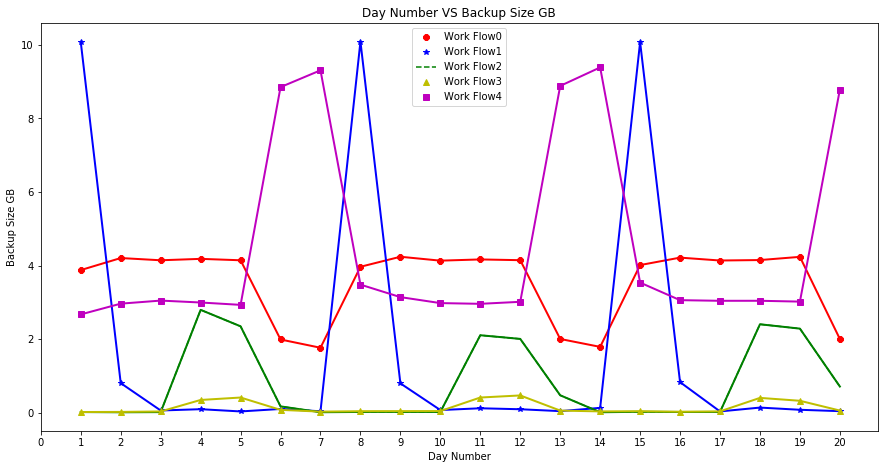

In [36]:
#plotting the data for 20 days
size_of_backup_col = dataset['size_of_backup']
work_flow_id_col = dataset['work_flow_number']
number_of_days = 20
size_of_backup_per_day = {0:[0.0]*number_of_days, 1:[0.0]*number_of_days, 2:[0.0]*number_of_days, 3:[0.0]*number_of_days, 4:[0.0]*number_of_days}
for i in range(len(week_col)):
    if day_number[i] > number_of_days:
        break
    size_of_backup_per_day[work_flow_id_col[i]][day_number[i]-1] += size_of_backup_col[i]
plt.figure(figsize = (15,7.5))
color = ['r', 'b', 'g', 'y', 'm']
symbol = ['8', '*', '--', '^', 's']
for i in range(0,5):
    plt.plot(range(1,number_of_days+1), size_of_backup_per_day[i], symbol[i], c=color[i], label='Work Flow' + str(i))
    plt.plot(range(1, number_of_days+1), size_of_backup_per_day[i], linewidth = 2.0, c=color[i])
plt.title('Day Number VS Backup Size GB')
plt.xlabel('Day Number')
plt.ylabel('Backup Size GB')
plt.xticks(range(21))
plt.legend(loc = 'upper center')
plt.show()

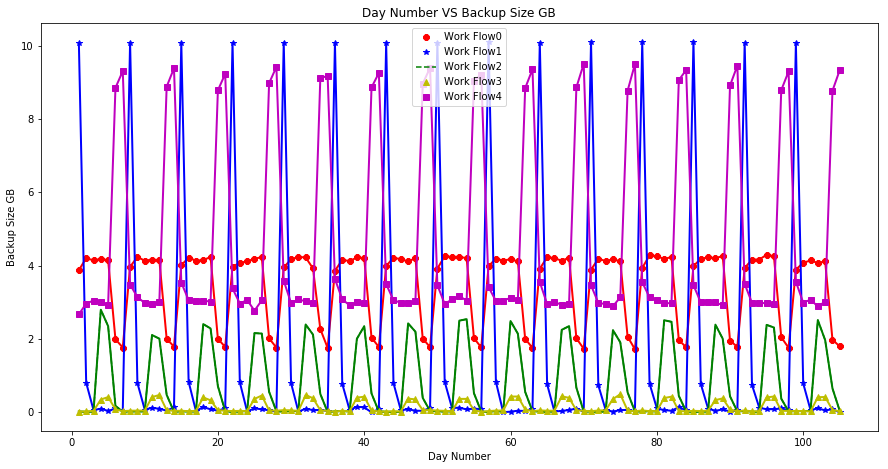

In [39]:
#plotting the data for 105 days
size_of_backup_col = dataset['size_of_backup']
work_flow_id_col = dataset['work_flow_number']
number_of_days = 105
size_of_backup_per_day = {0:[0.0]*number_of_days, 1:[0.0]*number_of_days, 2:[0.0]*number_of_days, 3:[0.0]*number_of_days, 4:[0.0]*number_of_days}
for i in range(len(week_col)):
    if day_number[i] > number_of_days:
        break
    size_of_backup_per_day[work_flow_id_col[i]][day_number[i]-1] += size_of_backup_col[i]
plt.figure(figsize = (15,7.5))
color = ['r', 'b', 'g', 'y', 'm']
symbol = ['8', '*', '--', '^', 's']
for i in range(0,5):
    plt.plot(range(1,number_of_days+1), size_of_backup_per_day[i], symbol[i], c=color[i], label='Work Flow' + str(i))
    plt.plot(range(1, number_of_days+1), size_of_backup_per_day[i], linewidth = 2.0, c=color[i])
plt.title('Day Number VS Backup Size GB')
plt.xlabel('Day Number')
plt.ylabel('Backup Size GB')
plt.legend(loc = 'upper center')
plt.show()

# Part 2